## lab2
## task

- Осуществить моделирование n = 1000 реализаций СВ из заданных дискретных распределений.
- Вывести на экран несмещенные оценки математического ожидания и дисперсии, сравнить их с истинными значениями.
- Для каждой из случайных величин построить свой χ^2-критерием Пирсона с уровнем значимость ε=0.05. Проверить, что вероятность ошибки I рода стремится к 0.05.
- Осуществить проверку каждой из сгенерированных выборок каждым из построенных критериев.

https://ru.wikipedia.org/wiki/%D0%93%D0%B8%D0%BF%D0%B5%D1%80%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd

In [2]:
from random import random

def bernoulli(p):
    boundary = 1-p
    return random() > boundary


def hyper_geom(N, n, k):
    # N all
    # n try
    # k black
    sum_ = 0
    p = k/N

    for i in range(1, n+1):
        y = bernoulli(p)
        if y :
            sum_ += 1
            if sum_ == k:
                return sum_
        p = (k - sum_) /(N - i)

    return sum_



N = 500 #all
D = 50 # black
n = 100 # taken off

mean_theory = n*D/N
var_theory = n*(D/N)*(1-D/N)*(N-n)/(N-1)


gen_numbers = [ hyper_geom(N,n,D) for i in range(1000)]

## Генирация 

In [3]:
from random import random
from math import exp, factorial

from lab1.generators import mcg


def uniform():
    N = 500000
    K = 64
    M = 2 ** 31 - 1
    C = 1231
    alpha0 = beta = 16807.0
    l = list(mcg(alpha0, beta, M, N, C))
    for i in range(N):
        yield l[i]

y = uniform()

def bernoulli(p):
    boundary = 1 - p
    x = y.__next__() > boundary
    return x


def get_next_hyper_geom(D, N, n):
    sum_ = 0
    p = D / N

    for i in range(1, n + 1):
        y = bernoulli(p)
        if y:
            sum_ += 1
            if sum_ == D:
                return sum_
        p = (D - sum_) / (N - i)

    return sum_


def HG(D, N, n, observed):
    """
    Hypergeometric binomial distribution
    """
    for i in range(observed):
        yield get_next_hyper_geom(D, N, n)


def C(n, k):
    return factorial(n) / (factorial(k) * factorial(n - k))


def hyper_geom_distribution(D, N, n, k):
    return C(D, k) * C(N - D, n - k) / C(N, n)


def hyper_geom_dstr(D, N, n):
    p = [hyper_geom_distribution(D, N, n, i) for i in range(max(0, D + n - N), min(n, D))]

    keys = [elem for elem in range(max(0, D + n - N), min(n, D))]

    return dict(zip(keys,p))

In [38]:
D = 10 # черных шаров
N = 60 # число всех шаром - и черных и белых
n = 20 # число вытаскиваний 
tryings = 5000
mean_theory = n*D/N
var_theory = n*(D/N)*(1-D/N)*(N-n)/(N-1)

gen_numbers = list(HG(D, N, n, tryings))

theory_freq = hyper_geom_dstr(D,N,n)

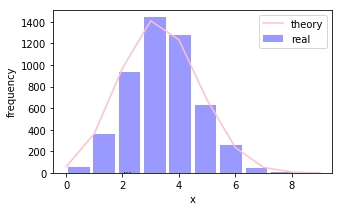

In [42]:
def draw(real,theory):
    plt.figure(figsize=(5,3))
    keys = list(theory.keys())
    plt.hist(x=real, label='real', bins=len(keys) , color='blue',alpha=0.4, rwidth=0.85)
    
    x = [elem*tryings for elem in theory.values()]
    plt.plot(x,label='theory', color='pink',alpha=0.99)
    plt.xlabel('x', fontsize=10)
    plt.ylabel('frequency', fontsize=10)
    plt.text(2, 4, r'...')
    plt.legend()
    plt.show()
    
draw(gen_numbers,theory_freq)

In [44]:
# n_i theory > =5  объед.интервалы

## Критерий Пирсона

In [33]:
from lab1.tests import pearson
from lab1.utils import format_test_result

gen_numbers_result = pearson(sorted(gen_numbers),  discrete=True, p_list = p)

print('\npearson, chi:')
print('\tmcg:\t' + format_test_result(*gen_numbers_result))


pearson, chi:
	mcg:	k = 10 | 3.253 < 16.919 | test passed 


## Несмещенные оценки

In [34]:
def bias_mean(x):
    return sum(x)/len(x)
    
def bias_var(x):
    bias_m = bias_mean(x)
    sum_=0
    for elem in x:
        sum_ += (elem - bias_m )**2
    return sum_/ (len(x)-1)


print('mean theory:\t',mean_theory,'\nmean real:\t',bias_mean(gen_numbers),
     '\neps:\t',abs(bias_mean(gen_numbers)-mean_theory),'\n')
print('var theory:\t',var_theory,'\nvar real:\t',bias_var(gen_numbers),
     '\neps:\t',abs(bias_var(gen_numbers)-var_theory),'\n')

mean theory:	 3.3333333333333335 
mean real:	 3.3394 
eps:	 0.006066666666666443 

var theory:	 1.8832391713747647 
var real:	 1.9133903180636045 
eps:	 0.03015114668883978 



In [35]:
from lab1.graph import draw_autocorr,draw_cdf,draw_freq,draw_intervals,draw_scatter

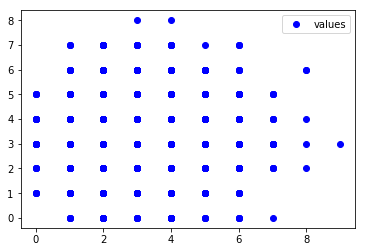

In [36]:
x_1 = [gen_numbers[i] for i in range(tryings) if i%2 == 1]
x_2 = [gen_numbers[i] for i in range(tryings) if i%2 == 0]
draw_scatter(x_1,x_2)



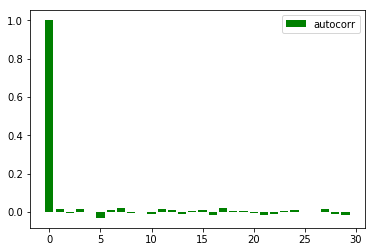

In [37]:
def autocorr(x, t=1):
    for i in range(0,t):
        y = x + [0]*i
        y = [ y[j+i] for j in range(len(x)) ]
        corr = np.corrcoef([x,y])
        yield corr[0][1]

corr = list(autocorr(gen_numbers,t=30))
draw_autocorr(corr)

In [ ]:
# при 100 плохая автокорреляция
# при 5000 намного лучше